In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('03_Delivery.csv', encoding='cp949')

In [3]:
df1.head()

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231


In [5]:
df1['주문일(datetime)'] = pd.to_datetime(df1['주문일'], format='%Y%m%d')

In [7]:
df1['주문요일'] = df1['주문일(datetime)'].dt.day_name()

In [8]:
df1['주문요일'].value_counts()

Monday       9903
Wednesday    8737
Thursday     8697
Tuesday      8404
Friday       6665
Sunday       2429
Saturday     1914
Name: 주문요일, dtype: int64

In [25]:
df1['주중/주말'] = df1['주문요일'].replace({'Monday':'주중', 'Tuesday':'주중','Wednesday':'주중','Thursday':'주중','Friday':'주중','Saturday':'주말','Sunday':'주말'})

In [26]:
df1['주중/주말'].value_counts()

주중    42406
주말     4343
Name: 주중/주말, dtype: int64

In [27]:
df1.pivot_table(index='주중/주말', values='수량', aggfunc=sum)

,수량
주중/주말,
주말,5149
주중,49878


In [29]:
df1.pivot_table(index='주중/주말', values='상품구매금액', aggfunc='sum')

,상품구매금액
주중/주말,
주말,306863800
주중,2936027585


In [30]:
df1.pivot_table(index='주중/주말', values='상품구매금액', aggfunc='mean')

,상품구매금액
주중/주말,
주말,70657.103385
주중,69236.136042


<AxesSubplot:xlabel='주중/주말', ylabel='상품구매금액'>

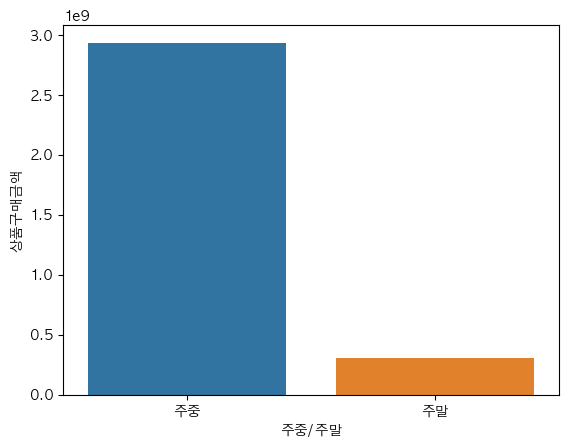

In [32]:
mpl.rc('font', family='AppleGothic')
sns.barplot(data=df1, x='주중/주말', y='상품구매금액', estimator=sum, ci=None)

<AxesSubplot:xlabel='주중/주말', ylabel='상품구매금액'>

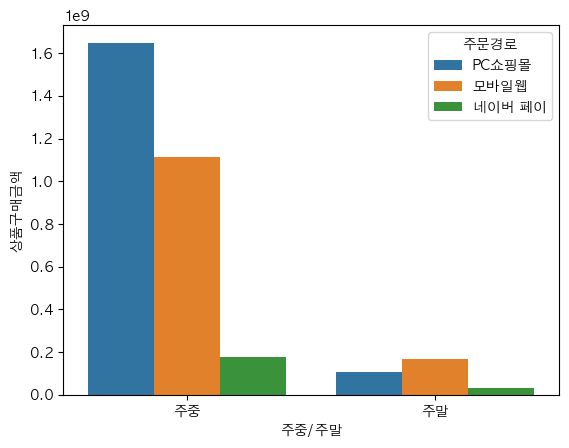

In [33]:
sns.barplot(data=df1, x='주중/주말', y='상품구매금액', estimator=sum, ci=None, hue='주문경로')

In [41]:
def func1(row):
    return row.split(' ')[0]

df1['배송시작일(date)'] = pd.to_datetime(df1['배송시작일'].apply(func1))
df1['배송완료일(date)'] = pd.to_datetime(df1['배송완료일'].apply(func1))

In [43]:
df1['배송기간'] = df1['배송완료일(date)'] - df1['배송시작일(date)']

In [44]:
df1['배송기간'].describe()

count                        46749
mean     4 days 04:38:57.008278251
std      1 days 04:56:12.144368428
min                0 days 00:00:00
25%                4 days 00:00:00
50%                4 days 00:00:00
75%                4 days 00:00:00
max               47 days 00:00:00
Name: 배송기간, dtype: object

In [49]:
cond1 = (df1['배송기간'] != '4 days')
cond2 = (df1['배송기간'] != '3 days')
cond3 = (df1['배송기간'] != '2 days')
cond4 = (df1['배송기간'] != '1 days')
cond5 = (df1['배송기간'] != '0 days')

df1.loc[cond1 & cond2 & cond3 & cond4 & cond5]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문요일,주중/주말,배송시작일(date),배송완료일(date),배송기간
41,카드,D-20190101-0000055-01,2019-01-03 오전 9:32,2019-01-09 오후 3:47,42350,1283.0,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-09,6 days
47,적립금,D-20190101-0000106-01,2019-01-03 오전 9:30,2019-01-13 오전 7:19,68970,38.0,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-13,10 days
68,카드,D-20190102-0000013-01,2019-01-03 오전 9:30,2019-01-08 오전 9:21,78870,603.0,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-08,5 days
102,카드,D-20190102-0000224-01,2019-01-03 오전 9:30,2019-01-08 오후 2:01,134640,1282.0,2,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-08,5 days
106,무통장입금,D-20190102-0000242-01,2019-01-03 오전 9:30,2019-01-09 오후 1:01,123420,70.0,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-09,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46738,카드,D-20171228-0000132-02,2017-12-29 오후 4:34,2018-01-03 오전 10:38,76600,107.0,10,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-03,5 days
46739,카드,D-20171228-0000132-03,2017-12-29 오후 4:34,2018-01-03 오전 9:20,47300,248.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-03,5 days
46740,카드,D-20171228-0000132-04,2017-12-29 오후 4:34,2018-01-07 오전 4:55,69960,293.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days
46741,카드,D-20171228-0000132-05,2017-12-29 오후 4:34,2018-01-07 오전 4:55,63140,305.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days


In [54]:
def func2(row):
    return str(row).split(' ')[0]

df1['배송기간(int)'] = (df1['배송기간'].apply(func2)).astype(int)

In [56]:
cond1 = (df1['배송기간(int)'] >= 7)

df1.loc[cond1].to_excel('delay_delivery.xlsx')

In [57]:
df1

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문요일,주중/주말,배송시작일(date),배송완료일(date),배송기간,배송기간(int)
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2018-12-27,Thursday,주중,2019-01-07,2019-01-11,4 days,4
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2018-12-29,Saturday,주말,2019-01-03,2019-01-07,4 days,4
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2018-12-30,Sunday,주말,2019-01-03,2019-01-07,4 days,4
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2018-12-31,Monday,주중,2019-01-03,2019-01-07,4 days,4
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2018-12-31,Monday,주중,2019-01-07,2019-01-11,4 days,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229,2017-12-29,Friday,주중,2017-12-29,2018-01-02,4 days,4
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229,2017-12-29,Friday,주중,2018-01-03,2018-01-07,4 days,4
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230,2017-12-30,Saturday,주말,2018-01-02,2018-01-11,9 days,9
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231,2017-12-31,Sunday,주말,2018-01-03,2018-01-06,3 days,3
